In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/NFLX.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
df['Change'] = round(- 100 +(df["Close"] * 100 / df["Open"]),2)

In [ ]:
is_same = df["Close"] == df["Adj Close"]
is_same.value_counts()

True    1009
dtype: int64

In [ ]:
df = df.drop("Adj Close", axis = 1)

In [ ]:
df1 = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Open    1009 non-null   float64
 2   High    1009 non-null   float64
 3   Low     1009 non-null   float64
 4   Close   1009 non-null   float64
 5   Volume  1009 non-null   int64  
 6   Change  1009 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
import matplotlib.pyplot as plt

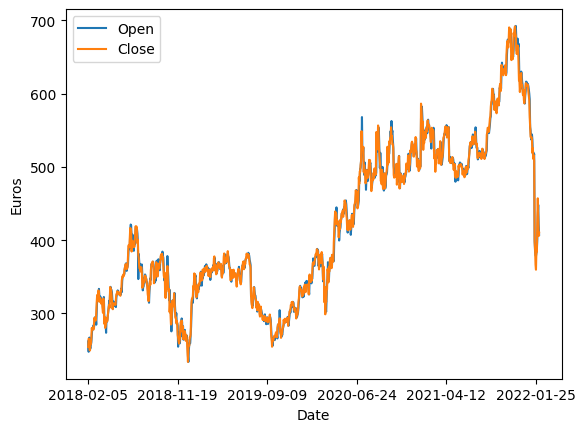

In [ ]:
df.plot(x = "Date", y = ["Open","Close"], kind = "line")
plt.ylabel("Euros")
plt.show()

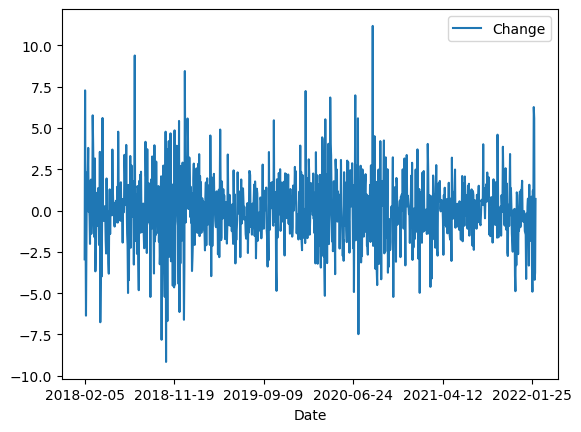

In [ ]:
df.plot(x = "Date", y = "Change", kind = "line")
plt.show()

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
per_month = df.set_index("Date").groupby(pd.Grouper(freq = "M")).mean()
per_month = per_month.reset_index()

In [ ]:
import seaborn as sns

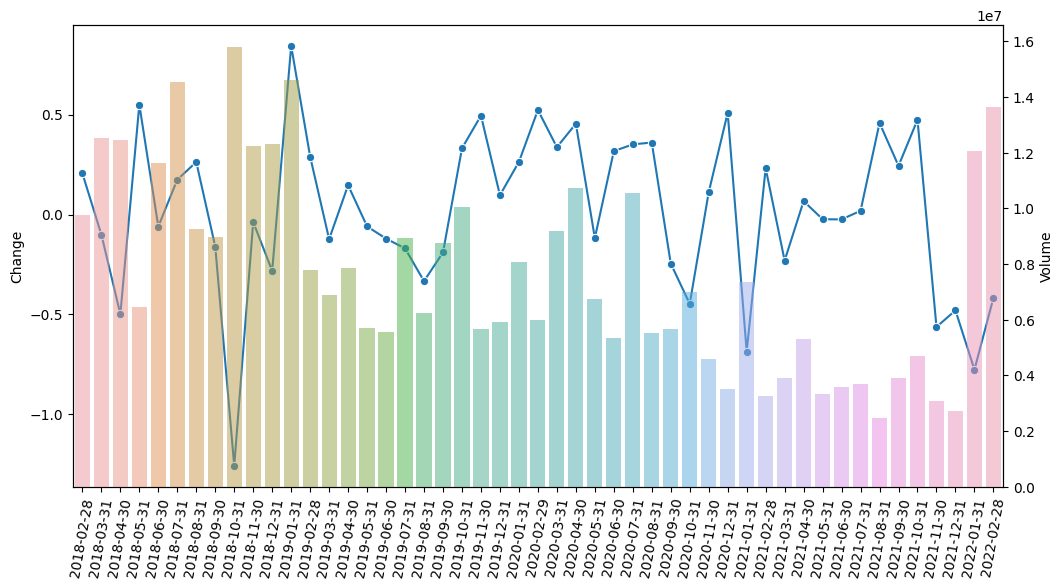

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = per_month["Change"] , marker='o', sort = False, ax=ax1)
plt.xticks(rotation = 80)
ax2 = ax1.twinx()

sns.barplot(data = per_month, x = per_month['Date'].dt.date, y = 'Volume', alpha = 0.5, ax = ax2)

plt.show()

In [ ]:
pd.melt(per_month[["Close","Open","Date"]],["Date"])

,Date,variable,value
0,2018-02-28,Close,272.054705
1,2018-03-31,Close,312.228097
2,2018-04-30,Close,307.466192
3,2018-05-31,Close,331.536819
4,2018-06-30,Close,384.133336
...,...,...,...
93,2021-10-31,Open,639.220474
94,2021-11-30,Open,671.363334
95,2021-12-31,Open,611.568640
96,2022-01-31,Open,492.055000


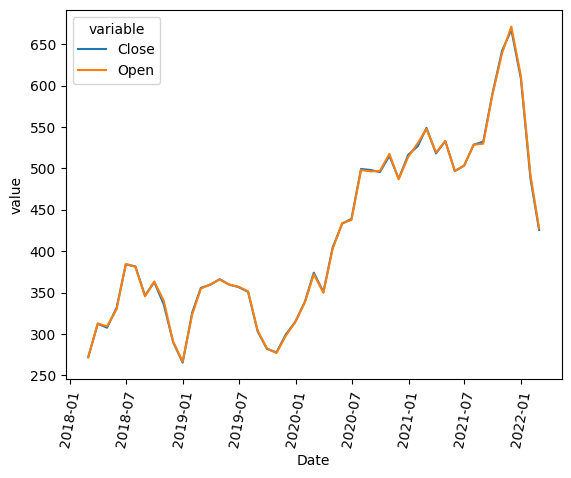

In [ ]:
sns.lineplot(x = "Date", y = "value",hue = "variable", data = pd.melt(per_month[["Close","Open","Date"]],["Date"]))
plt.xticks(rotation = 80)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df1 = df1.drop("Date",axis = 1)

In [ ]:
X = df1.drop("Close",axis = 1)
y = df1["Close"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([312.06653759, 507.19675468, 526.90538176, 271.43002727,
       361.29196068, 301.92477663, 319.4509589 , 321.45765851,
       472.63443098, 302.40676305, 352.07530484, 314.1571953 ,
       292.44339647, 386.79516247, 407.98885225, 537.61999197,
       269.0117749 , 628.38502364, 291.53991281, 528.15884729,
       340.13029405, 398.24637704, 626.32049379, 394.55023028,
       326.20562728, 331.38248294, 318.99347008, 362.83725006,
       533.13089572, 431.09535762, 376.6879459 , 271.11421202,
       322.84509276, 367.82237018, 447.37454422, 503.26896788,
       338.10830459, 673.58054245, 500.76638425, 613.20431485,
       421.47534119, 424.96604972, 478.36067518, 298.76019816,
       506.83146639, 547.48885948, 354.29042198, 574.31683377,
       502.48340437, 512.27137324, 515.78130475, 301.07357394,
       429.7027712 , 380.22542241, 482.27350426, 522.85819313,
       510.89288741, 468.78920666, 362.80095216, 350.61784888,
       332.35455973, 320.59402973, 280.6499084 , 363.78

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [ ]:
Validation = [["MSE:",  mean_squared_error(y_test,y_pred)], ["RMAE:",  np.sqrt(mean_absolute_error(y_test,y_pred))],
              ["MAE:", mean_absolute_error(y_test,y_pred)], ["r2:",  r2_score(y_test,y_pred)]]

In [ ]:
for name,val in Validation :
    val = val
    print(name, round(val,3))

MSE: 3.799
RMAE: 1.185
MAE: 1.404
r2: 1.0


In [ ]:
def style():
    plt.figure(facecolor = "black",figsize = (15,10))
    ax = plt.axes()
    ax.tick_params(axis = "x", colors = "white")
    ax.tick_params(axis = "y", colors = "white")

    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.set_facecolor("black")

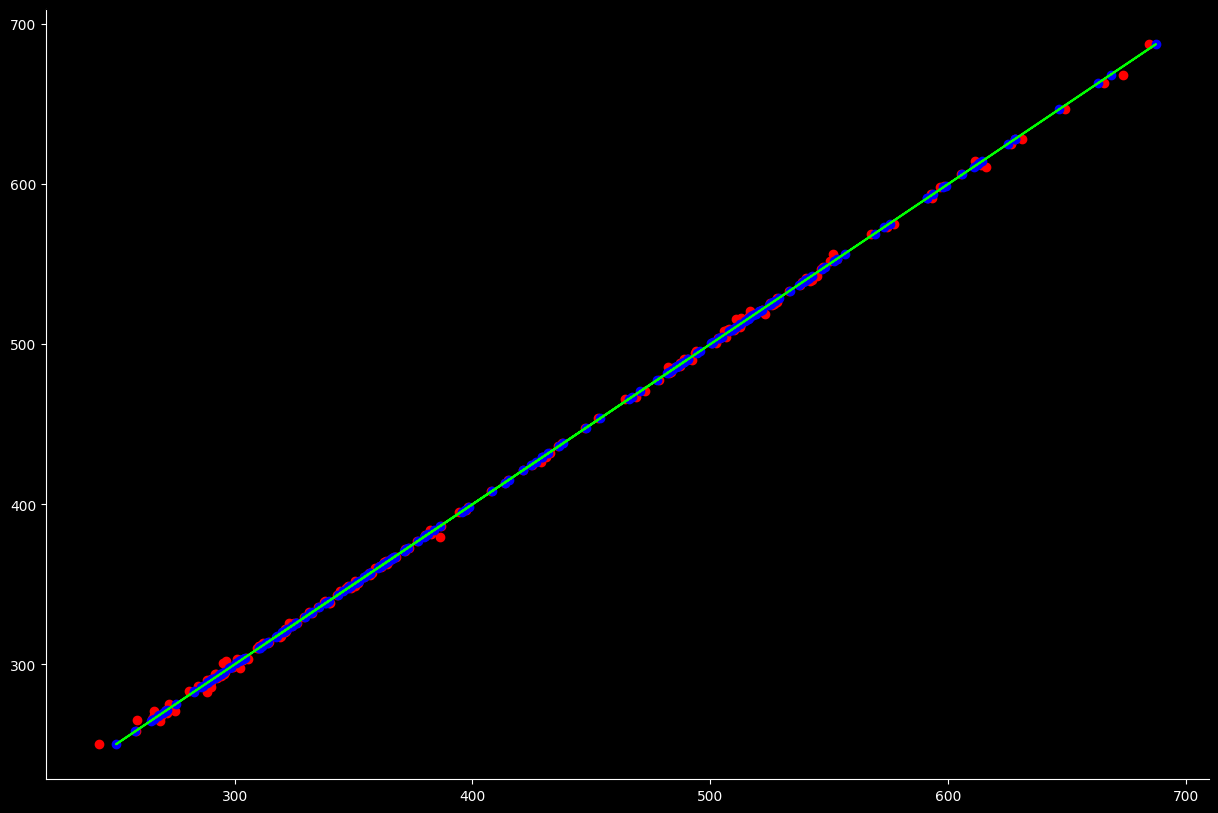

In [ ]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')